In [1]:
import numpy as np #Import Python Library (This is where the data is stored and pulled from the csv)
import pandas as pd # Import software library (This is a software library written for python) This library is used for data manipulation and analysis
import matplotlib.pyplot as plt #Import plotting library (This is used to display graphical data)
import scipy.stats as stats #Import python library (This is used for scientific computations)

In [2]:
data0 = np.genfromtxt('Geneva Ionomics_X_Spec_as_int.csv',delimiter = ',', skip_header = 1) # This generates data from the csv text
data0 = pd.DataFrame(data0) # This arranges the csv data into an object that pandas can use
data = data0.drop(data0.columns[0:2],axis = 1) # This removes columns one and two which are the plant species and plant number,these will be added back in the final step
plt.rcParams['figure.figsize'] = (20,10) # This sets the parameters for the size of the figure

In [3]:
data

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,94.737452,196.644672,1776.847433,14.015541,6214.957396,1986.070463,18823.60057,5107.996944,45.755582,191.923742,0.081735,0.811444,33.255243,95.859746,0.005128,16.256776,5.981147,0.278855,0.024450
1,23.352362,131.009202,1166.801218,15.981347,5660.589666,1305.737926,15284.87070,3971.658387,40.226177,101.724123,0.048140,0.343131,33.814473,69.386864,0.017477,7.492277,3.537671,0.156314,0.060345
2,137.680886,111.022071,1976.897836,26.302390,7208.531961,2512.636791,20787.04128,5653.053084,65.567369,146.973893,0.063966,0.277827,58.400894,83.124578,0.004849,7.214685,3.383637,0.297982,0.017739
3,18.207032,58.447077,1469.811734,24.007341,5342.222323,2400.683753,16094.43910,3800.777526,60.854345,218.874289,0.099867,0.416359,55.600415,120.534218,0.010221,11.923196,1.183187,0.171235,0.038915
4,58.775194,119.388231,1349.136877,67.323999,5412.124249,2412.665543,17162.72458,2307.560196,91.539069,357.633934,0.169915,0.658896,68.828553,153.686687,0.060230,7.493530,1.004368,0.194630,0.021889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,23.959331,68.082473,833.263322,14.223409,4453.316979,1577.213543,13845.07525,2670.873577,36.033468,265.737020,0.132533,0.571258,52.450855,89.326233,0.015168,2.262299,1.335820,0.500273,0.021432
197,97.260086,177.251767,1001.935219,14.787185,4185.088107,1616.720403,14511.86532,2951.506577,38.816688,265.065594,0.103872,0.493594,55.975908,80.988379,0.012150,2.278884,1.760048,0.388168,0.032249
198,118.418595,142.109108,1208.820270,26.843473,4462.374828,2092.301281,14404.28727,2182.446643,44.998215,319.821056,0.141606,0.505986,50.276855,134.466411,0.018501,2.082073,1.355822,0.104287,0.040485
199,247.246548,388.678285,1709.199420,24.868124,5198.472128,2422.367553,14335.07116,5729.398750,64.358779,365.062978,0.144896,0.667751,62.193586,157.650724,0.018435,2.138815,5.008329,0.176858,0.060998


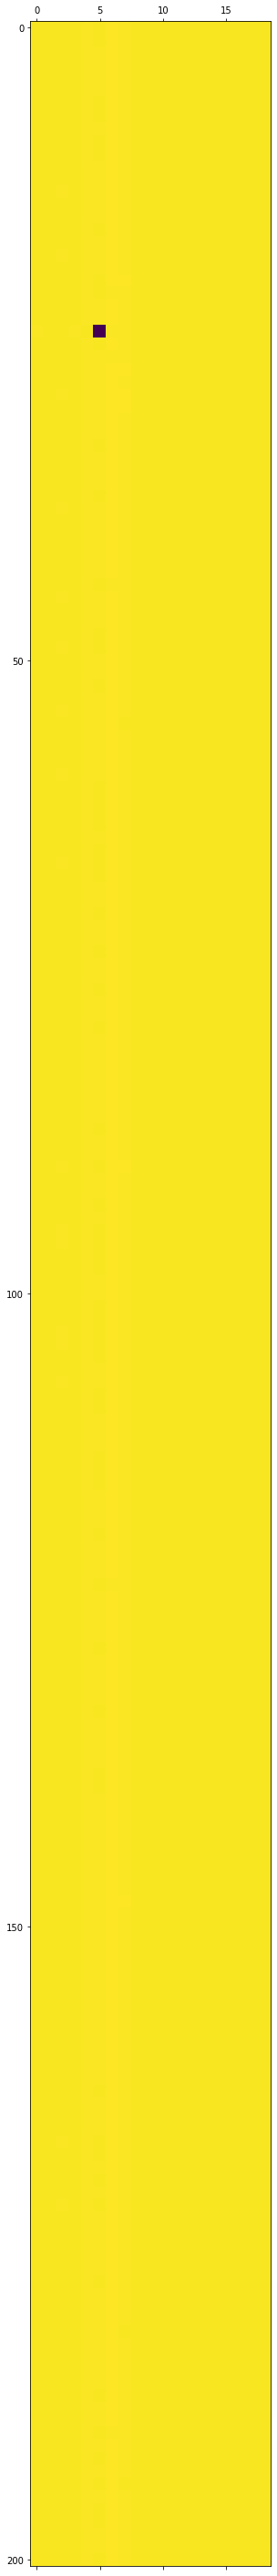

In [5]:
plt.figure(figsize=(5,50)) # This sets the parameters of the following figure which is a heatmap
plt.matshow(data,fignum =1) # This shows the graphic of the heatmap

 The one purple square is a negative value found in As in plant 588355. This will be removed in the following steps.

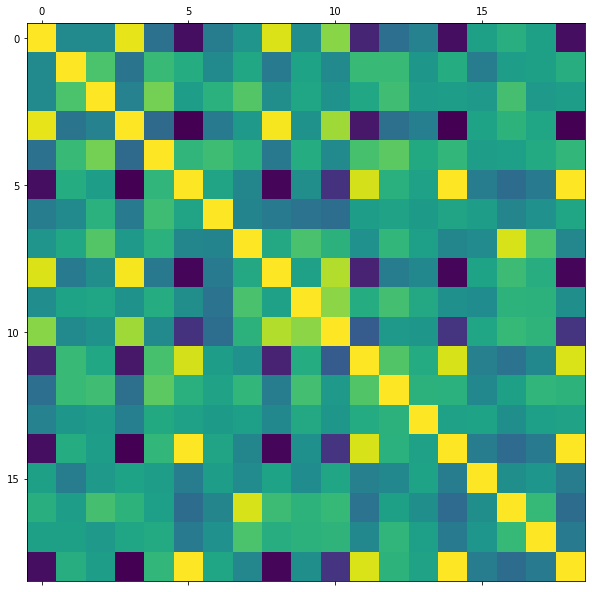

In [6]:
plt.matshow(data.corr()) # This creates the correlation matrix shown below

In [7]:
z = pd.DataFrame(np.arange(4221).reshape(201,21)) #This creates a dummy dataframe for our z value
z = z.astype('float32') #Float is used when storing data with decimal points to keep it precise 
z.drop(z.columns[0:2],axis = 1, inplace = True ) #This drops two columns in our dummy dataframe

In [8]:
for x in range(2,(data.shape[1]+2)): #This gives the dimensions of the array along the x axis
    mean = data[x].mean() #This gives the average of one column of data on the x axis
    stdev = data[x].std() #This gives the standard deviation of one column of the the x axis
    print(x,"m: ",mean,"s: ",stdev) #This prints the mean and standard deviation of the individual columns
    for y in range(data.shape[0]): #This gives the dimension of the array along the y axis
        zscore = (data[x][y] - mean)/stdev #This is the equation that gives us the z score
        z[x][y] = zscore #Assigning the name zscore to the value obtained from the equation
        if data[x][y] < 0: #If the data obtained is less than zero
            z[x][y] = "NaN" #Then it is not treated as a number
z

2 m:  117.82130703303484 s:  182.20973227757136
3 m:  219.54159767920413 s:  149.56859631826427
4 m:  1588.2152712313436 s:  331.2125273928873
5 m:  36.63457736532839 s:  228.518923445346
6 m:  5781.441573930351 s:  888.8581685869885
7 m:  -10688.194416233822 s:  183664.78041574452
8 m:  16965.026826562196 s:  2417.8285994036146
9 m:  5695.611252492539 s:  2791.4412709462936
10 m:  59.87245425437813 s:  67.28708521605236
11 m:  274.58113184353243 s:  138.91946175045305
12 m:  0.1294091493980099 s:  0.09164188765858862
13 m:  0.857721915124378 s:  2.5549895895579384
14 m:  60.66398050860695 s:  30.225857081820767
15 m:  132.00975081164185 s:  86.5040874990805
16 m:  -0.018393795169154216 s:  0.4882258429033867
17 m:  5.706202215218902 s:  3.3578299134942284
18 m:  4.53500235699005 s:  3.1297172207965556
19 m:  0.34334810547263667 s:  0.338454008623927
20 m:  0.0063739437860696494 s:  0.3318189112318609


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-0.126688,-0.153086,0.569520,-0.098981,0.487722,0.069008,0.768695,-0.210506,-0.209801,-0.595002,-0.520220,-0.018113,-0.906798,-0.417899,0.048178,3.142081,0.462069,-0.190551,0.054475
1,-0.518463,-0.591918,-1.272337,-0.090379,-0.135963,0.065303,-0.694903,-0.617585,-0.291977,-1.244297,-0.886815,-0.201406,-0.888296,-0.723930,0.073472,0.531913,-0.318665,-0.552613,0.162651
2,0.108993,-0.725550,1.173514,-0.045214,1.605532,0.071875,1.580763,-0.015246,0.084636,-0.918570,-0.714122,-0.226966,-0.074873,-0.565120,0.047607,0.449243,-0.367882,-0.134040,0.034250
3,-0.546701,-1.077061,-0.357485,-0.055257,-0.494139,0.071265,-0.360070,-0.678801,0.014593,-0.401001,-0.322360,-0.172745,-0.167524,-0.132659,0.058610,1.851492,-1.070964,-0.508526,0.098067
4,-0.324056,-0.669615,-0.721828,0.134297,-0.415496,0.071330,0.081767,-1.213728,0.470619,0.597849,0.441997,-0.077818,0.270119,0.250589,0.161040,0.532287,-1.128100,-0.439403,0.046756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-0.515132,-1.012640,-2.279358,-0.098071,-1.494192,0.066781,-1.290394,-1.083576,-0.354288,-0.063664,0.034090,-0.112119,-0.271725,-0.493428,0.068742,-1.025634,-1.022195,0.463653,0.045381
197,-0.112844,-0.282745,-1.770102,-0.095604,-1.795960,0.066997,-1.014614,-0.983042,-0.312924,-0.068497,-0.278667,-0.142516,-0.155101,-0.589815,0.062561,-1.020694,-0.886647,0.132426,0.077979
198,0.003278,-0.517706,-1.145473,-0.042846,-1.484001,0.069586,-1.059107,-1.258549,-0.221056,0.325656,0.133088,-0.137666,-0.343650,0.028399,0.075570,-1.079307,-1.015804,-0.706332,0.102800
199,0.710309,1.130830,0.365276,-0.051490,-0.655863,0.071383,-1.087735,0.012104,0.066674,0.651326,0.168991,-0.074353,0.050606,0.296413,0.075434,-1.062409,0.151236,-0.491914,0.164621


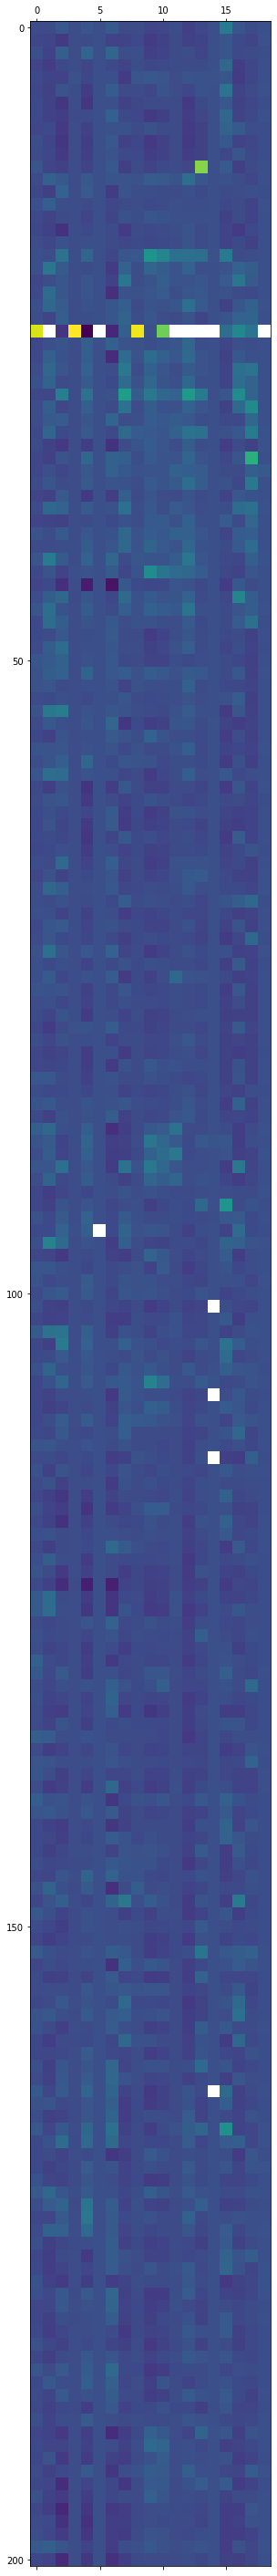

In [9]:
plt.figure(figsize=(5,50)) #This sets the figure size
plt.matshow(z,fignum =1) #This shows the graphic of the heatmap

That indv. is pretty messed up. Remove it?

In [10]:
for x in range(2,(z.shape[1]+2)): # counts through columns
    print(x,"k: ", z[x].kurt(),"s: ", z[x].skew(),"v: ",z[x].var()) #This prints the kutosis,skew, and variance
    if z[x].kurt() > 40: #If the kurtosis is below 40 there will be no checkfor outliers
        cutoff = z[x].quantile(.999) #This means that the cutoff value will be 99.9percent
        for y in range(z.shape[0]): #counts through rows
            if z[x][y] > cutoff: #If the z value is greater than the cutoff number
                z[x][y] = 'NaN' #Then it is treated as not a number
z

2 k:  145.15053 s:  11.179619 v:  0.9999999403953552
3 k:  1.3498292 s:  1.2846323 v:  0.9483765959739685
4 k:  1.3901187 s:  0.65503055 v:  0.9999998211860657
5 k:  200.40927 s:  14.146464 v:  1.0000004768371582
6 k:  1.8016208 s:  -0.31658268 v:  1.0000001192092896
7 k:  0.3509671 s:  0.33300728 v:  5.603441422863398e-06
8 k:  0.17640433 s:  -0.30496684 v:  1.0000001192092896
9 k:  6.1489244 s:  1.7931776 v:  1.000000238418579
10 k:  176.4867 s:  12.890425 v:  1.0000001192092896
11 k:  5.757013 s:  1.8125856 v:  1.0000001192092896
12 k:  50.376072 s:  5.603277 v:  1.0000001192092896
13 k:  13.223928 s:  3.4299788 v:  0.23725679516792297
14 k:  4.9926467 s:  1.5414177 v:  0.9317722320556641
15 k:  69.157646 s:  6.8978505 v:  0.9849131107330322
16 k:  58.008694 s:  6.30946 v:  0.0009550247923471034
17 k:  6.1076894 s:  1.9388089 v:  1.000000238418579
18 k:  4.5183787 s:  1.8649229 v:  1.0000003576278687
19 k:  16.144094 s:  3.229981 v:  1.0
20 k:  42.25485 s:  4.948221 v:  0.0046232985

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-0.126688,-0.153086,0.569520,-0.098981,0.487722,0.069008,0.768695,-0.210506,-0.209801,-0.595002,-0.520220,-0.018113,-0.906798,-0.417899,0.048178,3.142081,0.462069,-0.190551,0.054475
1,-0.518463,-0.591918,-1.272337,-0.090379,-0.135963,0.065303,-0.694903,-0.617585,-0.291977,-1.244297,-0.886815,-0.201406,-0.888296,-0.723930,0.073472,0.531913,-0.318665,-0.552613,0.162651
2,0.108993,-0.725550,1.173514,-0.045214,1.605532,0.071875,1.580763,-0.015246,0.084636,-0.918570,-0.714122,-0.226966,-0.074873,-0.565120,0.047607,0.449243,-0.367882,-0.134040,0.034250
3,-0.546701,-1.077061,-0.357485,-0.055257,-0.494139,0.071265,-0.360070,-0.678801,0.014593,-0.401001,-0.322360,-0.172745,-0.167524,-0.132659,0.058610,1.851492,-1.070964,-0.508526,0.098067
4,-0.324056,-0.669615,-0.721828,0.134297,-0.415496,0.071330,0.081767,-1.213728,0.470619,0.597849,0.441997,-0.077818,0.270119,0.250589,0.161040,0.532287,-1.128100,-0.439403,0.046756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-0.515132,-1.012640,-2.279358,-0.098071,-1.494192,0.066781,-1.290394,-1.083576,-0.354288,-0.063664,0.034090,-0.112119,-0.271725,-0.493428,0.068742,-1.025634,-1.022195,0.463653,0.045381
197,-0.112844,-0.282745,-1.770102,-0.095604,-1.795960,0.066997,-1.014614,-0.983042,-0.312924,-0.068497,-0.278667,-0.142516,-0.155101,-0.589815,0.062561,-1.020694,-0.886647,0.132426,0.077979
198,0.003278,-0.517706,-1.145473,-0.042846,-1.484001,0.069586,-1.059107,-1.258549,-0.221056,0.325656,0.133088,-0.137666,-0.343650,0.028399,0.075570,-1.079307,-1.015804,-0.706332,0.102800
199,0.710309,1.130830,0.365276,-0.051490,-0.655863,0.071383,-1.087735,0.012104,0.066674,0.651326,0.168991,-0.074353,0.050606,0.296413,0.075434,-1.062409,0.151236,-0.491914,0.164621


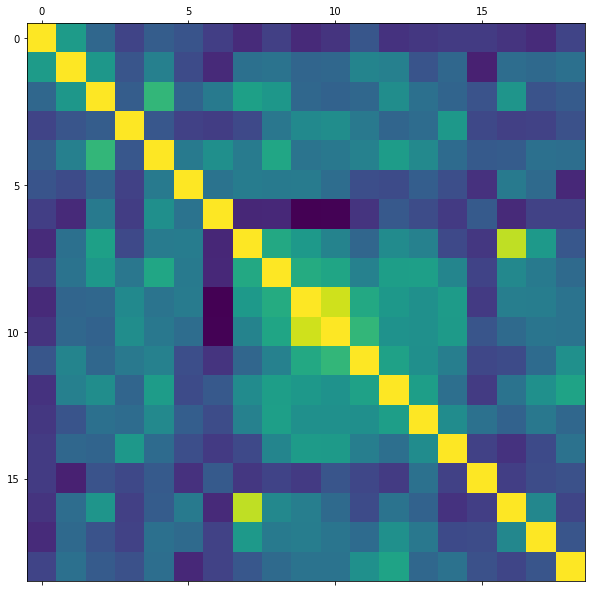

In [11]:
plt.matshow(z.corr()) #This plots the correlation matrix of the mineral concentrations

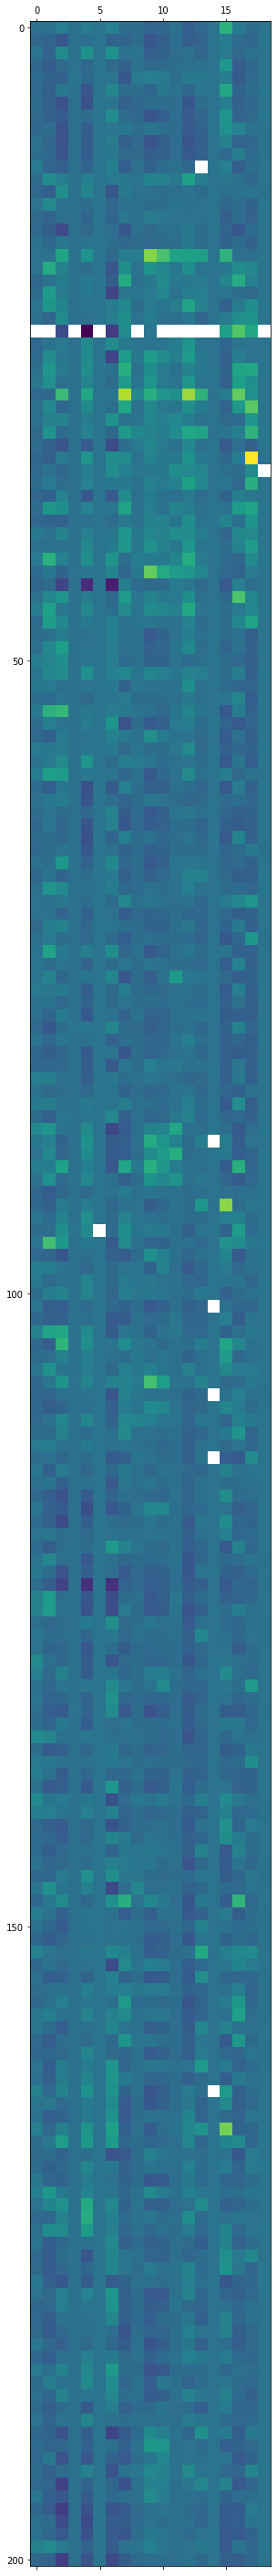

In [12]:
plt.figure(figsize=(5,50)) #This sets the figure size
plt.matshow(z,fignum=1) #This shows the graphic of the heatmap

In [13]:
f = pd.DataFrame(np.arange(4221).reshape(201,21)) #This means that all of the date on the right side of the equals sign is now denoted as f,pd dataframe means we are pulling the dataframe from the pandas library,the dot means we are choosing one function called dataframe fromthe library,np.arrange measn we are choosing the arrange function form the numpy library,we are analyzing (4221) data points from our csv file and reshaping them into 201 columns and 21 rows       
f = f.astype(str) #This coverts the data denoted as f into a new type called string
f[0] = data0[0] #This means that column zero in dataframe f is coulmn zero in dataframe zero
f[1] = data0[1] #This means that column one in dataframe f is column one in dataframe zero
for x in range(2,(z.shape[1])+2): #Counts through columns
    f[x] = z[x] #This means that every column in f equals every column in z,this is the operation where we are adding abck the two columns that were dropped back at the beginning 
f

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,318684.0,1.0,-0.126688,-0.153086,0.569520,-0.098981,0.487722,0.069008,0.768695,-0.210506,...,-0.595002,-0.520220,-0.018113,-0.906798,-0.417899,0.048178,3.142081,0.462069,-0.190551,0.054475
1,588141.0,1.0,-0.518463,-0.591918,-1.272337,-0.090379,-0.135963,0.065303,-0.694903,-0.617585,...,-1.244297,-0.886815,-0.201406,-0.888296,-0.723930,0.073472,0.531913,-0.318665,-0.552613,0.162651
2,588646.0,1.0,0.108993,-0.725550,1.173514,-0.045214,1.605532,0.071875,1.580763,-0.015246,...,-0.918570,-0.714122,-0.226966,-0.074873,-0.565120,0.047607,0.449243,-0.367882,-0.134040,0.034250
3,588448.0,1.0,-0.546701,-1.077061,-0.357485,-0.055257,-0.494139,0.071265,-0.360070,-0.678801,...,-0.401001,-0.322360,-0.172745,-0.167524,-0.132659,0.058610,1.851492,-1.070964,-0.508526,0.098067
4,1583.0,1.0,-0.324056,-0.669615,-0.721828,0.134297,-0.415496,0.071330,0.081767,-1.213728,...,0.597849,0.441997,-0.077818,0.270119,0.250589,0.161040,0.532287,-1.128100,-0.439403,0.046756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,483184.0,8.0,-0.515132,-1.012640,-2.279358,-0.098071,-1.494192,0.066781,-1.290394,-1.083576,...,-0.063664,0.034090,-0.112119,-0.271725,-0.493428,0.068742,-1.025634,-1.022195,0.463653,0.045381
197,483188.0,8.0,-0.112844,-0.282745,-1.770102,-0.095604,-1.795960,0.066997,-1.014614,-0.983042,...,-0.068497,-0.278667,-0.142516,-0.155101,-0.589815,0.062561,-1.020694,-0.886647,0.132426,0.077979
198,483190.0,8.0,0.003278,-0.517706,-1.145473,-0.042846,-1.484001,0.069586,-1.059107,-1.258549,...,0.325656,0.133088,-0.137666,-0.343650,0.028399,0.075570,-1.079307,-1.015804,-0.706332,0.102800
199,483187.0,8.0,0.710309,1.130830,0.365276,-0.051490,-0.655863,0.071383,-1.087735,0.012104,...,0.651326,0.168991,-0.074353,0.050606,0.296413,0.075434,-1.062409,0.151236,-0.491914,0.164621


In [14]:
f.to_csv('New_ionStats_X.csv',header = ('INVO','Spec_int','B11','Na23','Mg26','Al27','P31','S34','K39','Ca44','Fe54','Mn55','Co59','Ni60','Cu63',
                                      'Zn66','As75','Rb85','Sr88','Mo98','Cd111'))